In [1]:
import requests

In [2]:
#1 Universities List
w1 = requests.get('http://universities.hipolabs.com/search?country=United+States')

In [3]:
import json

In [4]:
# Assign new variable
w1new_json = w1.content

In [5]:
# Convert JSON Array to Python list
new1_json = json.loads(w1new_json)

In [6]:
type(new1_json)

list

In [7]:
import pandas as pd

In [8]:
Data1 = pd.DataFrame(new1_json)
Data1.head(5)

,country,name,alpha_two_code,state-province,domains,web_pages
0,United States,Marywood University,US,None,[marywood.edu],[http://www.marywood.edu]
1,United States,Lindenwood University,US,None,[lindenwood.edu],[http://www.lindenwood.edu/]
2,United States,Sullivan University,US,None,[sullivan.edu],[https://sullivan.edu/]
3,United States,Florida State College at Jacksonville,US,None,[fscj.edu],[https://www.fscj.edu/]
4,United States,Xavier University,US,None,[xavier.edu],[https://www.xavier.edu/]


In [9]:
Data1.shape

(2173, 6)

In [10]:
Data1.columns

Index(['country', 'name', 'alpha_two_code', 'state-province', 'domains',
       'web_pages'],
      dtype='object')

In [11]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         2173 non-null   object
 1   name            2173 non-null   object
 2   alpha_two_code  2173 non-null   object
 3   state-province  41 non-null     object
 4   domains         2173 non-null   object
 5   web_pages       2173 non-null   object
dtypes: object(6)
memory usage: 102.0+ KB


In [12]:
Data1.isnull().sum()

country              0
name                 0
alpha_two_code       0
state-province    2132
domains              0
web_pages            0
dtype: int64

In [13]:
Data1.drop(['state-province','alpha_two_code'], axis ='columns', inplace = True)
Data1.head(5)

,country,name,domains,web_pages
0,United States,Marywood University,[marywood.edu],[http://www.marywood.edu]
1,United States,Lindenwood University,[lindenwood.edu],[http://www.lindenwood.edu/]
2,United States,Sullivan University,[sullivan.edu],[https://sullivan.edu/]
3,United States,Florida State College at Jacksonville,[fscj.edu],[https://www.fscj.edu/]
4,United States,Xavier University,[xavier.edu],[https://www.xavier.edu/]


In [14]:
Data1.isnull().sum()

country      0
name         0
domains      0
web_pages    0
dtype: int64

In [15]:
# Check columns ='name' have duplicate or not
Data1[Data1.duplicated('name')]

,country,name,domains,web_pages
1202,United States,Westminster College,[westminster-mo.edu],[http://www.westminster-mo.edu/]
1354,United States,Glendale Community College,[glendale.edu],[http://www.glendale.edu]
1508,United States,College of DuPage,[cod.edu],[http://www.cod.edu]
1574,United States,Highland Community College,[highlandcc.edu],[http://www.highlandcc.edu]
1639,United States,Middlesex Community College,[middlesex.mass.edu],[http://www.middlesex.mass.edu]
1736,United States,Three Rivers Community College,[trcc.edu],[http://www.trcc.edu]
1760,United States,Manchester Community College,[mccnh.edu],[http://www.mccnh.edu]
1881,United States,Southeastern Community College,[sccnc.edu],[http://www.sccnc.edu]
1883,United States,Southwestern Community College,[southwesterncc.edu],[http://www.southwesterncc.edu]
2068,United States,Blue Ridge Community College,[brcc.edu],[http://www.brcc.edu]


In [16]:
Data1.duplicated('name').sum()

10

In [17]:
#remove
Data1.drop_duplicates('name', inplace = True)
Data1.head(5)

,country,name,domains,web_pages
0,United States,Marywood University,[marywood.edu],[http://www.marywood.edu]
1,United States,Lindenwood University,[lindenwood.edu],[http://www.lindenwood.edu/]
2,United States,Sullivan University,[sullivan.edu],[https://sullivan.edu/]
3,United States,Florida State College at Jacksonville,[fscj.edu],[https://www.fscj.edu/]
4,United States,Xavier University,[xavier.edu],[https://www.xavier.edu/]


In [18]:
Data1.shape

(2163, 4)

In [19]:
Data1.columns = [col.upper() for col in Data1]
Data1.columns

Index(['COUNTRY', 'NAME', 'DOMAINS', 'WEB_PAGES'], dtype='object')

In [20]:
Data1.head(10)

,COUNTRY,NAME,DOMAINS,WEB_PAGES
0,United States,Marywood University,[marywood.edu],[http://www.marywood.edu]
1,United States,Lindenwood University,[lindenwood.edu],[http://www.lindenwood.edu/]
2,United States,Sullivan University,[sullivan.edu],[https://sullivan.edu/]
3,United States,Florida State College at Jacksonville,[fscj.edu],[https://www.fscj.edu/]
4,United States,Xavier University,[xavier.edu],[https://www.xavier.edu/]
5,United States,Tusculum College,[tusculum.edu],[https://home.tusculum.edu/]
6,United States,Claremont School of Theology,[cst.edu],[https://cst.edu/]
7,United States,Columbia College (SC),[columbiasc.edu],[https://www.columbiasc.edu/]
8,United States,Chabot-Las Positas Community College District,[clpccd.edu],[http://www.clpccd.edu/]
9,United States,Keller Graduate School of Management,[keller.edu],[https://www.keller.edu/]


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
Data1.dtypes

COUNTRY      object
NAME         object
DOMAINS      object
WEB_PAGES    object
dtype: object

In [23]:
import folium

In [24]:
#Example
m = folium.Map(
    location=[39.64653286996934, -101.73890087266602],
    zoom_start=4,)
folium.Marker(
    location=[41.43514796619586, -75.63240194518674],
    popup='Marywood University',
    icon=folium.Icon(color='blue')
).add_to(m)
folium.Marker(
    location=[38.787398560353964, -90.50554264303796],
    popup='Lindenwood University',
    icon=folium.Icon(color='green')
).add_to(m)
folium.Marker(
    location=[38.21334271403076, -85.67059413365561],
    popup='Sullivan University',
    icon=folium.Icon(color='red')
).add_to(m)
folium.Marker(
    location=[30.33538723066952, -81.66244490976459],
    popup='Florida State College at Jacksonville',
    icon=folium.Icon(color='orange ')
).add_to(m)
folium.Marker(
    location=[39.14995730058493, -84.47411066061082],
    popup='Xavier University',
    icon=folium.Icon(color='purple')
).add_to(m)
m

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: color argument of Icon should be one of: {'lightred', 'darkblue', 'green', 'lightgray', 'pink', 'darkgreen', 'darkpurple', 'lightblue', 'white', 'cadetblue', 'blue', 'lightgreen', 'black', 'red', 'orange', 'gray', 'darkred', 'purple', 'beige'}.


In [25]:
#2 Data USA
w2 = requests.get('https://datausa.io/api/data?drilldowns=Nation&measures=Population')

In [26]:
w2new_json = w2.content

In [27]:
new2_json = json.loads(w2new_json)

In [28]:
type(new2_json)

dict

In [29]:
data = new2_json['data']

Data2 = pd.DataFrame(data)
Data2.head(5)

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2019,2019,328239523,united-states
1,01000US,United States,2018,2018,327167439,united-states
2,01000US,United States,2017,2017,325719178,united-states
3,01000US,United States,2016,2016,323127515,united-states
4,01000US,United States,2015,2015,321418821,united-states


In [30]:
Data2.shape

(7, 6)

In [31]:
Data2.columns

Index(['ID Nation', 'Nation', 'ID Year', 'Year', 'Population', 'Slug Nation'], dtype='object')

In [32]:
Data2.drop(['ID Year', 'Slug Nation'],axis ='columns', inplace= True)

In [33]:
Data2

,ID Nation,Nation,Year,Population
0,01000US,United States,2019,328239523
1,01000US,United States,2018,327167439
2,01000US,United States,2017,325719178
3,01000US,United States,2016,323127515
4,01000US,United States,2015,321418821
5,01000US,United States,2014,318857056
6,01000US,United States,2013,316128839


In [34]:
Data2.dtypes

ID Nation     object
Nation        object
Year          object
Population     int64
dtype: object

In [35]:
#change data type
data_type = {'Year' : int}
Data2 = Data2.astype(data_type)
Data2.dtypes

ID Nation     object
Nation        object
Year           int32
Population     int64
dtype: object

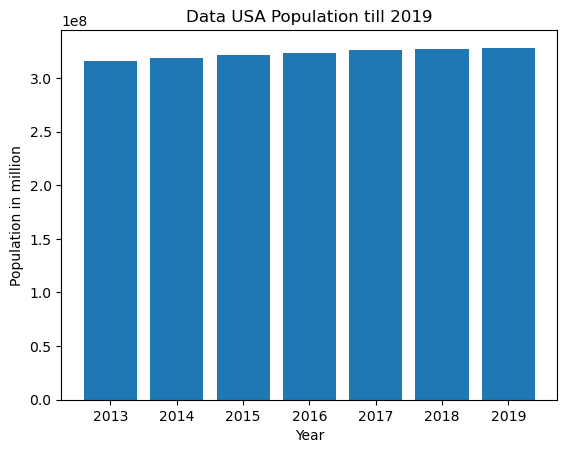

In [36]:
#Bar graph
x2 = Data2['Year']
ydata2 = Data2['Population']
plt.bar(x2,ydata2)
plt.xlabel('Year')
plt.ylabel('Population in million')
plt.title('Data USA Population till 2019')
plt.show()

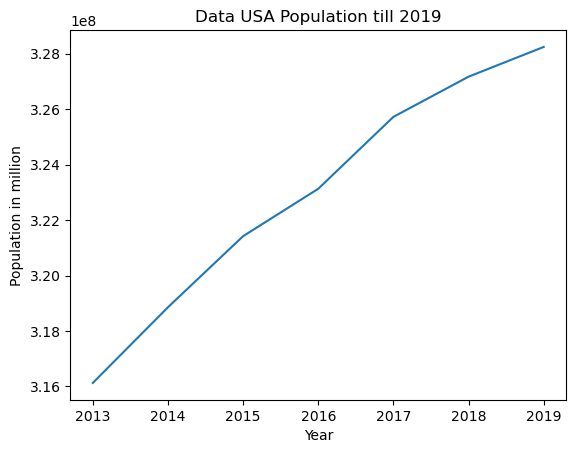

In [37]:
#line graphs
plt.plot(x2,ydata2)
plt.xlabel('Year')
plt.ylabel('Population in million')
plt.title('Data USA Population till 2019')
plt.show()

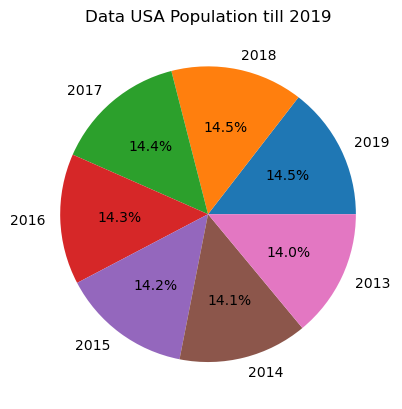

In [38]:
#pie graphs 
year = Data2['Year']
plt.pie(ydata2, labels=year, autopct='%1.1f%%')
plt.title('Data USA Population till 2019')
plt.show()

In [39]:
#3 Public APIs
w3 = requests.get('https://api.publicapis.org/entries')

In [40]:
w3new_json = w3.content

In [41]:
new3_json = json.loads(w3new_json)

In [42]:
type(new3_json)

dict

In [43]:
Data3 = pd.DataFrame(new3_json)
Data3.head(5)

,count,entries
0,935,"{'API': 'Axolotl', 'Description': 'Collection ..."
1,935,"{'API': 'Cat Facts', 'Description': 'Daily cat..."
2,935,"{'API': 'Cataas', 'Description': 'Cat as a ser..."
3,935,"{'API': 'catAPI', 'Description': 'Random pictu..."
4,935,"{'API': 'Cats', 'Description': 'Pictures of ca..."


In [44]:
Data3.shape

(935, 2)

In [45]:
Data3.columns

Index(['count', 'entries'], dtype='object')

In [46]:
df3 = pd.DataFrame(new3_json['entries'])
df3.head(5)

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals


In [47]:
df3.isnull().sum()

API            0
Description    0
Auth           0
HTTPS          0
Cors           0
Link           0
Category       0
dtype: int64

In [48]:
df3.head(10)

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals
5,Dog Facts,Random dog facts,,True,unknown,https://dukengn.github.io/Dog-facts-API/,Animals
6,Dogs,Based on the Stanford Dogs Dataset,,True,yes,https://dog.ceo/dog-api/,Animals
7,HTTPCat,Cat for every HTTP Status,,True,unknown,https://http.cat/,Animals
8,IUCN,IUCN Red List of Threatened Species,apiKey,False,unknown,http://apiv3.iucnredlist.org/api/v3/docs,Animals
9,Movebank,Movement and Migration data of animals,,True,unknown,https://github.com/movebank/movebank-api-doc,Animals


In [49]:
df3.dtypes

API            object
Description    object
Auth           object
HTTPS            bool
Cors           object
Link           object
Category       object
dtype: object

In [50]:
#Check which categories are available.
C = df3.pivot_table(index=['Category'], aggfunc='size')
C

Category
Animals                         18
Anime                           11
Anti-Malware                     8
Art & Design                    14
Authentication                   4
Books                           19
Business                        14
Calendar                        16
Cloud Storage & File Sharing    11
Continuous Integration           3
Cryptocurrency                  39
Currency Exchange               13
Data Validation                 11
Development                     81
Dictionaries                     9
Documents & Productivity        13
Environment                     10
Events                           4
Finance                         20
Food & Drink                    16
Games & Comics                  65
Geocoding                       66
Government                      44
Health                          20
Jobs                            14
Machine Learning                16
Music                           28
News                            14
Open Data  

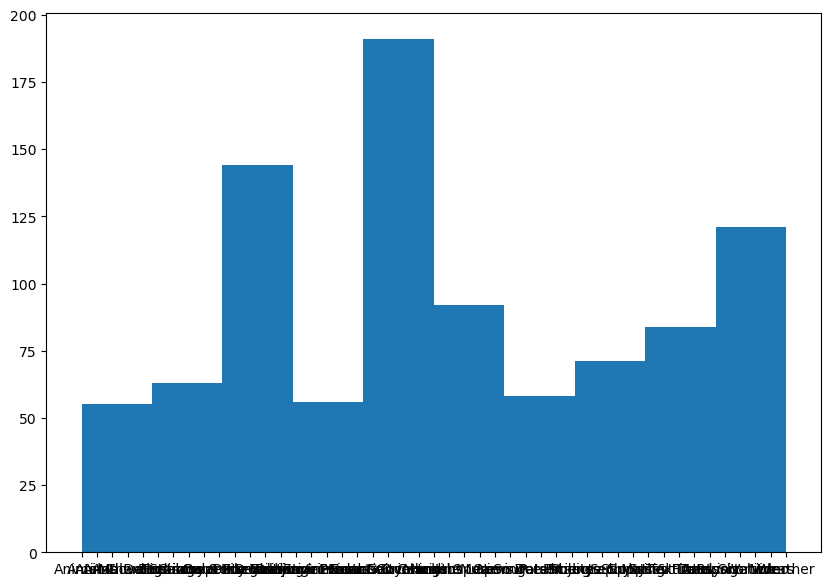

In [51]:
df3['Category'].hist(bins=10,figsize=(10,7),grid=False);
plt.show()

In [52]:
#Check frequency in HTTPS
fre = df3['HTTPS']
ds = pd.Series(fre)
ds.value_counts()

True     847
False     88
Name: HTTPS, dtype: int64

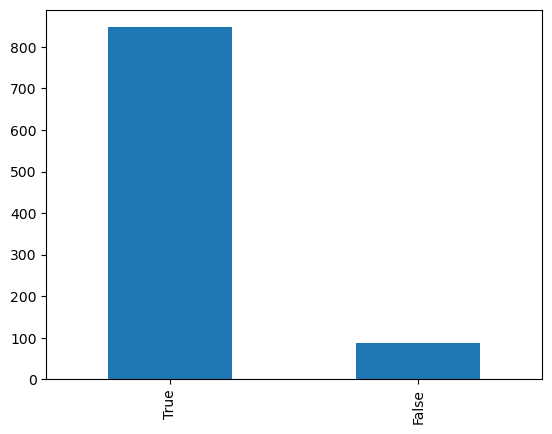

In [53]:
ds.value_counts().plot.bar()
plt.show()

In [54]:
#4 Nationalize.io
w4 = requests.get('https://api.nationalize.io/?name=nathaniel')

In [55]:
w4new_json = w4.content

In [56]:
new4_json = json.loads(w4new_json)

In [57]:
type(new4_json)

dict

In [58]:
Data4 = pd.DataFrame(new4_json)
Data4

,name,country
0,nathaniel,"{'country_id': 'GH', 'probability': 0.33064895..."
1,nathaniel,"{'country_id': 'US', 'probability': 0.21465914..."
2,nathaniel,"{'country_id': 'PH', 'probability': 0.16570760..."


In [59]:
df4 = pd.DataFrame(new4_json['country'])
df4

,country_id,probability
0,GH,0.330649
1,US,0.214659
2,PH,0.165708


In [60]:
df4.describe()

,probability
count,3.000000
mean,0.237005
std,0.084711
min,0.165708
25%,0.190183
50%,0.214659
75%,0.272654
max,0.330649


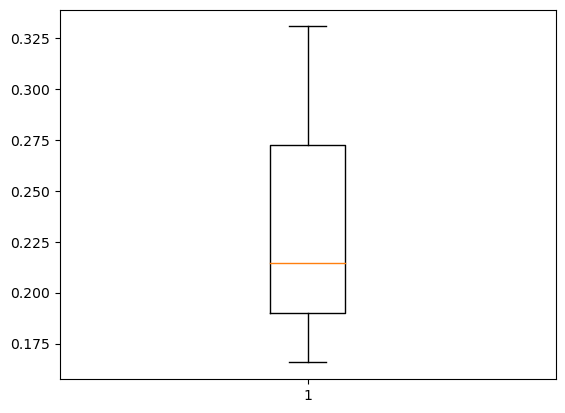

In [61]:
x4 = df4['probability']
plt.boxplot(x4)
plt.show()

In [62]:
#5 Genderize.io
w5 = requests.get('https://api.genderize.io/?name[]=peter&name[]=lois&name[]=stevie')

In [63]:
w5new_json = w5.content

In [64]:
new5_json = json.loads(w5new_json)

In [65]:
type(new5_json)

list

In [66]:
Data5 = pd.DataFrame(new5_json)
Data5

,name,gender,probability,count
0,peter,male,0.99,165452
1,lois,female,0.58,2510
2,stevie,male,0.87,2568


In [67]:
Data5.dtypes

name            object
gender          object
probability    float64
count            int64
dtype: object

In [68]:
Data5.describe()

,probability,count
count,3.000000,3.000000
mean,0.813333,56843.333333
std,0.210792,94057.868875
min,0.580000,2510.000000
25%,0.725000,2539.000000
50%,0.870000,2568.000000
75%,0.930000,84010.000000
max,0.990000,165452.000000


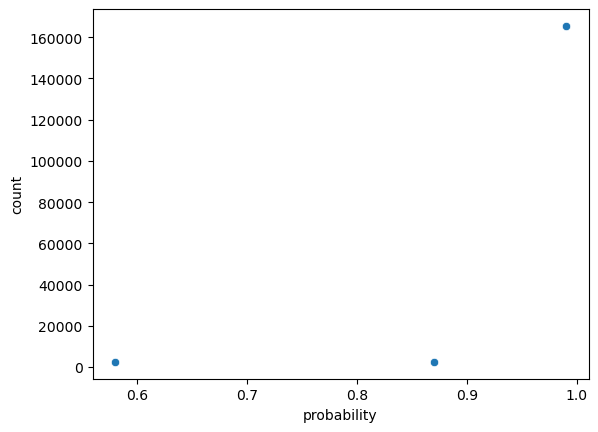

In [69]:
#Scatter
sns.scatterplot(x='probability',y='count', data =Data5)
plt.show()

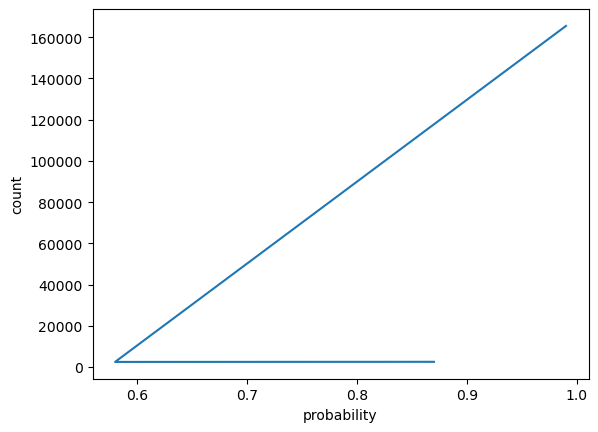

In [70]:
x5 = Data5['probability']
ydata5 =Data5['count']
plt.plot(x5,ydata5)
plt.xlabel('probability')
plt.ylabel('count')
plt.show()

In [71]:
fre5 = Data5['gender']
ds = pd.Series(fre5)
ds.value_counts()

male      2
female    1
Name: gender, dtype: int64

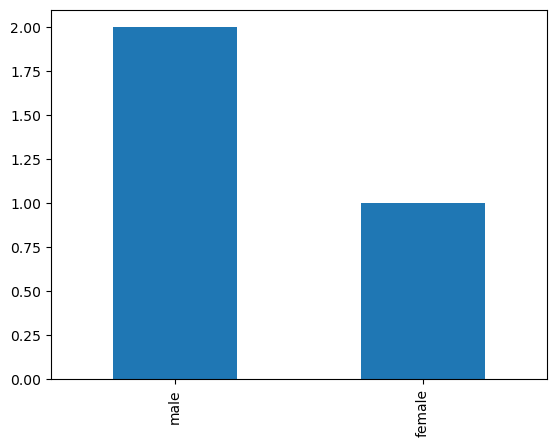

In [72]:
ds.value_counts().plot.bar()
plt.show()

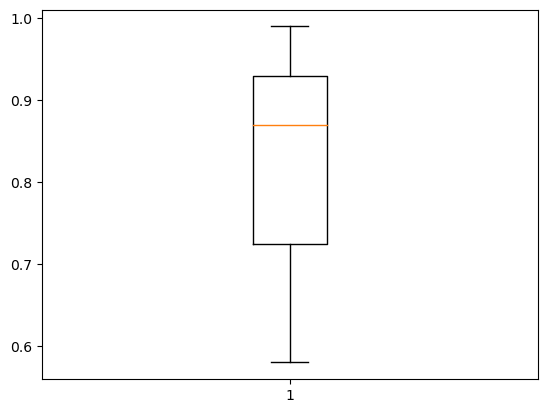

In [73]:
plt.boxplot(x5)
plt.show()